
# Exercício sobre sistemas nebulosos

Este exercício é baseado no notebook utilizado na aula de exemplos sobre sistemas nebulosos.
O problema continua sendo o mesmo, sobre a porcentagem do valor da conta que deve ser destinado à gorjeta.

## O problema da gorjeta 
O "problema de gorjeta" é comumente usado para ilustrar o poder dos princípios nebulosos de gerar comportamento complexo a partir de um conjunto compacto e intuitivo de regras especializadas.

### Variáveis de entrada

Um número de variáveis é decisivo para a quantia de gorjeta após um jantar. Considere dois deles:

* `` qualidade``: qualidade da comida
* `` serviço``: qualidade do serviço

### Variável de saída

A variável de saída é simplesmente o valor da gorjeta, em pontos percentuais:

* `` gorjeta``: porcentagem da conta a ser adicionada como gorjeta

Assumir que precisamos de funções de pertinência 'alta', 'média' e 'baixa' para as variáveis de entrada e de saída. 

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

Gerando as variáveis
  * Qualidade e serviço na faixa subjetiva [0,10]
  * Gorjeta na faixa de [0,25] pontos perceituais

In [ ]:
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

Gerando as funções de pertinência:

In [ ]:
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])

serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])

tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

In [ ]:
print(str(len(x_tip)) + ' tip ' + str(len(tip_lo)))

26 tip 26


Visualizando as variáveis e funções de pertinência

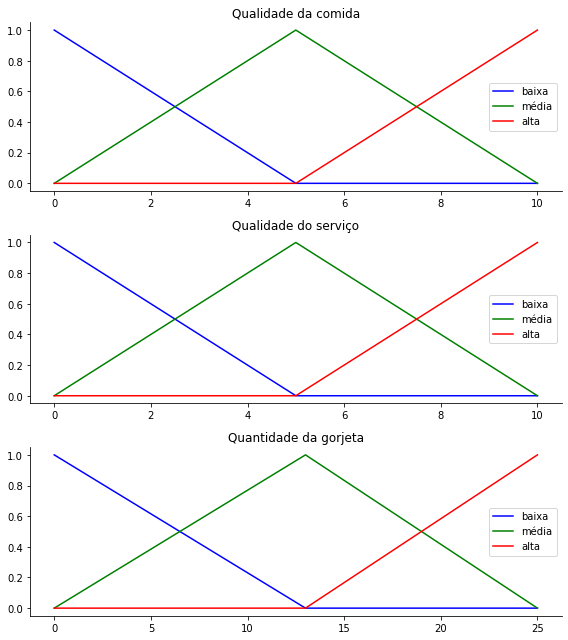

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='baixa')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='média')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='alta')
ax0.set_title('Qualidade da comida')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='baixa')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='média')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='alta')
ax1.set_title('Qualidade do serviço')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='baixa')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='média')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='alta')
ax2.set_title('Quantidade da gorjeta')
ax2.legend()

# desliga os eixos gráficos de cima e da direita
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()



Regras nebulosas
-----------

Agora, para tornar esses triângulos úteis, definimos o *relacionamento nebuloso* entre as variáveis de entrada e saída. Para os propósitos de nosso exemplo, considerar estas três regras simples:

1. Se a comida foi ruim OU o serviço foi ruim, a gorjeta será baixa
2. Se o serviço foi médio, a gorjeta será média
3. Se a comida foi ótima OU o serviço foi incrível, a gorjeta será alta.

A maioria das pessoas concorda com essas regras, mas as regras são imprecisas. Mapeando as regras imprecisas em uma gorjeta justa é um desafio. Isto é o tipo de tarefa na qual a lógica difusa é adequada.


Aplicação das regras
----------------

Qual seria o valor da gorjeta na seguintes situação:

* *Qualidade* da comida foi  **6.5**
* Qualidade do *Service* foi **9.8**

Neste ponto, é necessário ativar nossas funções de pertinência nebulosa a partir desses valores. Os valores exatos de 6.5 and 9.8 não existem explicitamente no sistema. A função fuzz.interp_membership é quem dá um significado nebuloso para eles.

In [ ]:
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)


Agora, vamos aplicar as regras. 

A regra 1 diz respeito a comida ou serviço ruim. O operador OR é implementado como o máximo desses dois valores.

In [ ]:
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)


Conectando o nível de atividação da regra 1 com a função de pertinência de saída. A operação de mínimo aplica um limiar superior nos pontos da função triagular representada por tip_lo:


In [ ]:
tip_activation_lo = np.fmin(active_rule1, tip_lo) 

Para a regra 2, nós conecatamos serviço aceitável com gorjeta média:

In [ ]:
tip_activation_md = np.fmin(serv_level_md, tip_md)

Para a regra 3, nós conectamos serviço incrível ou ótima comida com gorjeta alta:

In [ ]:
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

Vamos agora criar os subplots e desenhar gráficos das regras ativadas:

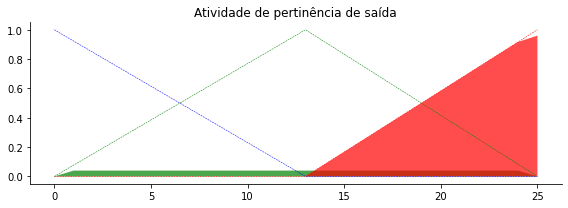

In [ ]:
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Atividade de pertinência de saída')

# desliga os eixos gráficos de cima e da direita
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

Agregação de regras
----------------

Com a *atividade* de cada função de apertinência de saída conhecida, todas as saídas devem ser combinadas. Isso geralmente é feito usando um
operador máximo. Esta etapa também é conhecida como *agregação*. 
Agregando todas as funções de pertinëncia saída:


In [ ]:
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

Defuzzificação
---------------
Para produzir uma resposta de volta ao ambiente,  precisamos combinar o resultado das regras de dispararam. Calculando o resultado defuzzificado:


In [ ]:
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # plot

Finalmente, vamos visualizar os resultados:

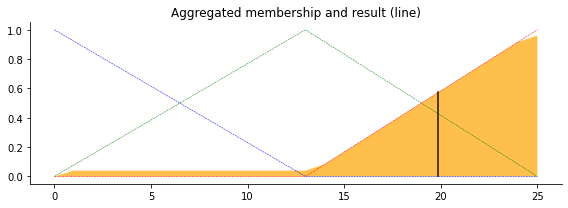

In [ ]:
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# desliga os eixos gráficos de cima e da direita
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## Agora é sua vez!

Modifique as funções de pertinência para que elas sejam em um formato gaussiano, ao invés de triangular. 

Em seguida, avalie as saídas para (Qualidade da comida=6.5 e 
Qualidade do Service=9.8), comparando o método triangular com o gaussiano.

**Qual obteve maior porcentagem de gorjeta? Se você fosse implementar este método em um restaurante, qual você utilizaria e por quê?**

Finalmente, para ambas as implementações,  plotar um gráfico 3D (valor da gorgeta no eixo z) e possíveis valores (intervalo de 0 a 10, com passo de 0.1) de serviço e comida nos eixos x e y, respectivamente. **O que é possível perceber ao se comparar esses gráficos?**

Dicas:

*   A função gaussiana pode ser obtida da seguinte forma:
    
    **`fuzz.gaussmf(list, mean, sigma)`**
    
    A média (mean) é o ponto central para a função gaussiana e o desvio padrão (sigma) é relacionado a sua largura.
    Uma sugestão de desvio padrão é 1.5 para as notas e 4 para as porcentagens.

*    Para fazer plots 3D em python, você pode consultar aqui: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.12-Three-Dimensional-Plotting.ipynb

# Definindo as funções de pertinência

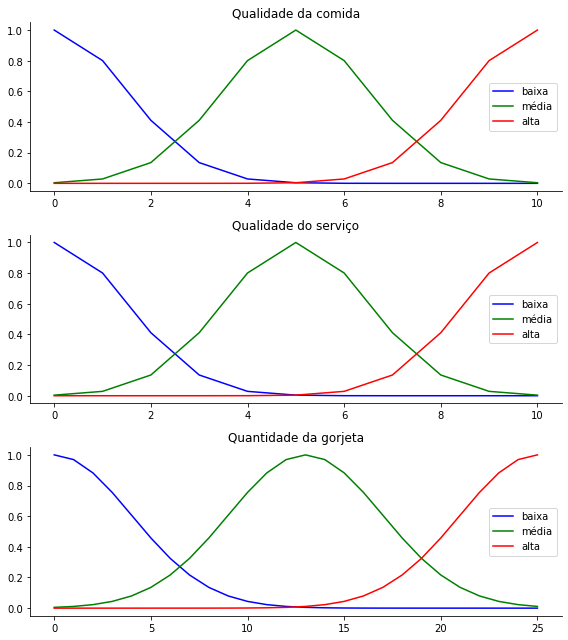

In [ ]:
qual_lo = fuzz.gaussmf(x_qual,0,1.5)
qual_md = fuzz.gaussmf(x_qual,5,1.5)
qual_hi = fuzz.gaussmf(x_qual,10,1.5)

serv_lo = fuzz.gaussmf(x_serv,0,1.5)
serv_md = fuzz.gaussmf(x_serv,5,1.5)
serv_hi = fuzz.gaussmf(x_serv,10,1.5)

tip_lo = fuzz.gaussmf(x_tip,0,4)
tip_md = fuzz.gaussmf(x_tip,13,4)
tip_hi = fuzz.gaussmf(x_tip,25,4)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='baixa')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='média')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='alta')
ax0.set_title('Qualidade da comida')
ax0.legend()


ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='baixa')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='média')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='alta')
ax1.set_title('Qualidade do serviço')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='baixa')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='média')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='alta')
ax2.set_title('Quantidade da gorjeta')
ax2.legend()

# desliga os eixos gráficos de cima e da direita
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()



# Relacionando as funções de pertinência:

In [ ]:
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)


# Conectando os níveis de ativação das regras com as funções de pertinência:

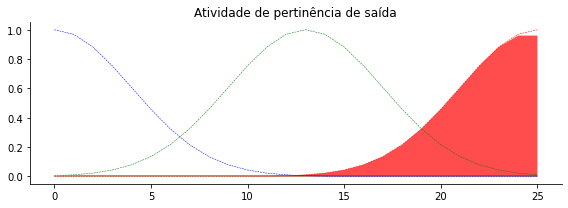

In [ ]:
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)
tip_activation_lo = np.fmin(active_rule1, tip_lo) 
tip_activation_md = np.fmin(serv_level_md, tip_md)
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Atividade de pertinência de saída')

# desliga os eixos gráficos de cima e da direita
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Defuzzificando, tem-se:

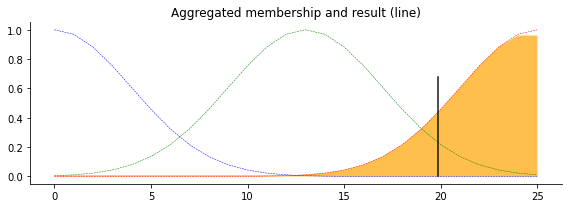

In [ ]:
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))
tip_gauss = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip_gauss)  # plot


fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# desliga os eixos gráficos de cima e da direita
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [ ]:
tip_activation

0.6756310874589

# **Qual obteve maior porcentagem de gorjeta? Se você fosse implementar este método em um restaurante, qual você utilizaria e por quê?**

In [ ]:
print("O valor percentual do modelo guassiano: " + str(tip_gauss))
print("O valor percentual do modelo triangular: " + str(tip))

O valor percentual do modelo guassiano: 21.465922193804726
O valor percentual do modelo triangular: 19.86871794871795


Utilizando como parâmetro que o percentual associado ao retorno da função de defuzzificação, a abordagem da curva gaussiana atinge um valor próximo a 21.47%, enquanto que, no caso da abordagem que utiliza funções de pertinência triangulares, esse valor fica próximo de 19.87%. 

Do ponto de vista do restaurante, o mais apropriado seria o método gaussiano, visto que o aporte financeiro associado à gorjeta tende a se manter quase constante quando as notas do serviço e da qualidade, combinadas, são medianas, especialmente levando em conta o esforço empreendido para a melhora de tais critérios e o valor de bonificação associado.

# **Plotar um gráfico 3D (valor da gorgeta no eixo z) e possíveis valores (intervalo de 0 a 10, com passo de 0.1) de serviço e comida nos eixos x e y, respectivamente**

Criou-se duas funções, *getTipGaussian()* e *getTipTriangular()*, que recebem as notas para a qualidade e serviço e retornam o percentual de gorjeta associado a estas notas.

In [ ]:
def getTipGaussian(quality_score,service_score):
  
  qual_lo = fuzz.gaussmf(x_qual,0,1.5)
  qual_md = fuzz.gaussmf(x_qual,5,1.5)
  qual_hi = fuzz.gaussmf(x_qual,10,1.5)

  serv_lo = fuzz.gaussmf(x_serv,0,1.5)
  serv_md = fuzz.gaussmf(x_serv,5,1.5)
  serv_hi = fuzz.gaussmf(x_serv,10,1.5)

  tip_lo = fuzz.gaussmf(x_tip,0,4)
  tip_md = fuzz.gaussmf(x_tip,13,4)
  tip_hi = fuzz.gaussmf(x_tip,25,4)

  qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, quality_score)
  qual_level_md = fuzz.interp_membership(x_qual, qual_md, quality_score)
  qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, quality_score)

  serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, service_score)
  serv_level_md = fuzz.interp_membership(x_serv, serv_md, service_score)
  serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, service_score)

  active_rule1 = np.fmax(qual_level_lo, serv_level_lo)
  tip_activation_lo = np.fmin(active_rule1, tip_lo) 
  tip_activation_md = np.fmin(serv_level_md, tip_md)
  active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
  tip_activation_hi = np.fmin(active_rule3, tip_hi)
  tip0 = np.zeros_like(x_tip)

  aggregated = np.fmax(tip_activation_lo,
                      np.fmax(tip_activation_md, tip_activation_hi))
  tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
  return tip



def getTipTriangular(quality_score,service_score):
  
  qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
  qual_md = fuzz.trimf(x_qual, [0, 5, 10])
  qual_hi = fuzz.trimf(x_qual, [5, 10, 10])

  serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
  serv_md = fuzz.trimf(x_serv, [0, 5, 10])
  serv_hi = fuzz.trimf(x_serv, [5, 10, 10])

  tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
  tip_md = fuzz.trimf(x_tip, [0, 13, 25])
  tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

  qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, quality_score)
  qual_level_md = fuzz.interp_membership(x_qual, qual_md, quality_score)
  qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, quality_score)

  serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, service_score)
  serv_level_md = fuzz.interp_membership(x_serv, serv_md, service_score)
  serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, service_score)

  active_rule1 = np.fmax(qual_level_lo, serv_level_lo)
  tip_activation_lo = np.fmin(active_rule1, tip_lo) 
  tip_activation_md = np.fmin(serv_level_md, tip_md)
  active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
  tip_activation_hi = np.fmin(active_rule3, tip_hi)
  tip0 = np.zeros_like(x_tip)

  aggregated = np.fmax(tip_activation_lo,
                      np.fmax(tip_activation_md, tip_activation_hi))
  tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
  return tip

# Chamando as funções para valores de qualidade de serviço e qualidade de comida variando no intervalo requerido, tem-se:

In [ ]:
Z_gaussian = []
Z_triangular = []
x = y = np.arange(0,10.1,0.1)
X,Y = np.meshgrid(x,y)
for quality in np.arange(0,10.1,0.1):
  for service in np.arange(0,10.1,0.1):
     Z_gaussian.append(getTipGaussian(quality,service))
     Z_triangular.append(getTipTriangular(quality,service))
Z_gaussian = np.array(Z_gaussian)
Z_triangular = np.array(Z_triangular)
Z_gaussian = Z_gaussian.reshape((101,101))
Z_triangular = Z_triangular.reshape((101,101))
Z_gaussian.shape

(101, 101)

# Exibindo as curvas associadas aos dois modelos:

Text(0.5, 0, 'Gorjeta Associada (R$)')

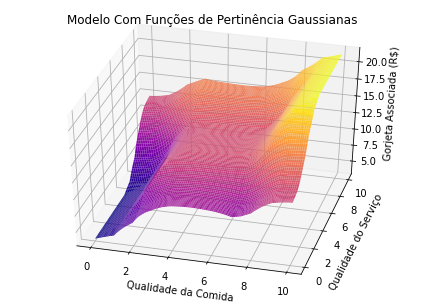

In [ ]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=38, azim=-75)
ax.plot_surface(X, Y, Z_gaussian, rstride=1, cstride=1,
                cmap='plasma', edgecolor='none')
ax.set_title('Modelo Com Funções de Pertinência Gaussianas');
ax.set_xlabel('Qualidade da Comida')
ax.set_ylabel('Qualidade do Serviço')
ax.set_zlabel('Gorjeta Associada (R$)')

Text(0.5, 0, 'Gorjeta Associada (R$)')

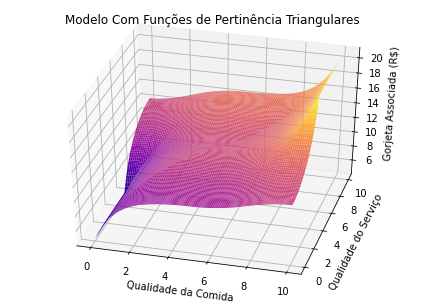

In [ ]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=38, azim=-75)
ax.plot_surface(X, Y, Z_triangular, rstride=1, cstride=1,
                cmap='plasma', edgecolor='none')
ax.set_title('Modelo Com Funções de Pertinência Triangulares');
ax.set_xlabel('Qualidade da Comida')
ax.set_ylabel('Qualidade do Serviço')
ax.set_zlabel('Gorjeta Associada (R$)')

##Atividade Bonus
Implemente uma solução o problema de controle nebuloso do ventilador visto em sala de aula, desta vez utilizando a API skfuzzy control. Em seguida, execute o programa para obter as correntes relativas do motor do ventilador referentes a uma sequencia de temperaturas (valores inteiros) no intervalo de 0 a 50 graus Célcius. Finalmente, você deve plotar um gráfico da temperatura versus corrente relativa.  **Descreva textualmente como é o comportamento da função, a partir de observação visual.**

